In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.metrics import silhouette_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from sklearn.pipeline import make_pipeline
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\miran\Downloads\Option_B_clustering - Option_B_clustering.csv")
df.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1,2,9,2,0,240,0,1,78,85,80,85,82
1,0,2,2,1,0,60,0,1,70,68,70,64,60
2,0,3,5,1,0,60,0,1,72,71,74,88,75
3,0,1,5,0,0,60,0,1,69,30,63,35,75
4,1,2,3,0,0,60,0,1,70,65,62,75,68


# Clustering

## Cleaning Data

In [3]:
df.duplicated().sum()

7

In [4]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12730 entries, 0 to 12736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                12730 non-null  int64
 1   highest_education     12730 non-null  int64
 2   imd_band              12730 non-null  int64
 3   age_band              12730 non-null  int64
 4   num_of_prev_attempts  12730 non-null  int64
 5   studied_credits       12730 non-null  int64
 6   disability            12730 non-null  int64
 7   passed_course         12730 non-null  int64
 8   assess_score_1        12730 non-null  int64
 9   assess_score_2        12730 non-null  int64
 10  assess_score_3        12730 non-null  int64
 11  assess_score_4        12730 non-null  int64
 12  assess_score_5        12730 non-null  int64
dtypes: int64(13)
memory usage: 1.4 MB


In [6]:
#I don't see missing data above but need to verify with isna.
df.isna().sum()

gender                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
passed_course           0
assess_score_1          0
assess_score_2          0
assess_score_3          0
assess_score_4          0
assess_score_5          0
dtype: int64

In [7]:
#added this to see all the columns in describe
pd.set_option('display.max_columns', None)

In [8]:
df.describe()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
count,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000
mean,0.446819,2.090102,4.407070,0.339199,0.107463,74.773763,0.091909,0.763001,73.987274,74.915240,79.734328,75.661822,78.106127
std,0.497183,0.940932,2.806379,0.488965,0.389890,37.459380,0.288909,0.425259,19.166495,14.654117,17.653542,17.967908,19.529946
min,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,60.000000,0.000000,1.000000,66.000000,66.000000,69.000000,65.000000,67.000000
50%,0.000000,2.000000,4.000000,0.000000,0.000000,60.000000,0.000000,1.000000,77.000000,76.000000,81.000000,79.000000,80.000000
75%,1.000000,3.000000,7.000000,1.000000,0.000000,90.000000,0.000000,1.000000,86.000000,86.000000,95.000000,89.000000,96.000000
max,1.000000,4.000000,9.000000,2.000000,6.000000,630.000000,1.000000,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## KMeans Clustering

In [9]:
#make a copy of data. Incase I mess up.
kmeans_df = df.copy()

Preparing for Clustering

In [10]:
# Instantiate Standard Scaler and Fit
scaler = StandardScaler()
scaled_kmeans_df = pd.DataFrame(scaler.fit_transform(kmeans_df), columns=kmeans_df.columns)
scaled_kmeans_df.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1.112675,-0.095762,1.636668,3.396696,-0.275634,4.410984,-0.318137,0.557328,0.209370,0.688213,0.015050,0.519735,0.199387
1,-0.898735,-0.095762,-0.857748,1.351481,-0.275634,-0.394410,-0.318137,0.557328,-0.208042,-0.471916,-0.551431,-0.649062,-0.927132
2,-0.898735,0.967056,0.211288,1.351481,-0.275634,-0.394410,-0.318137,0.557328,-0.103689,-0.267187,-0.324839,0.686706,-0.159051
3,-0.898735,-1.158580,0.211288,-0.693734,-0.275634,-0.394410,-0.318137,0.557328,-0.260218,-3.065146,-0.947968,-2.263114,-0.159051
4,1.112675,-0.095762,-0.501402,-0.693734,-0.275634,-0.394410,-0.318137,0.557328,-0.208042,-0.676645,-1.004616,-0.036835,-0.517489


Text(0, 0.5, 'Inertia')

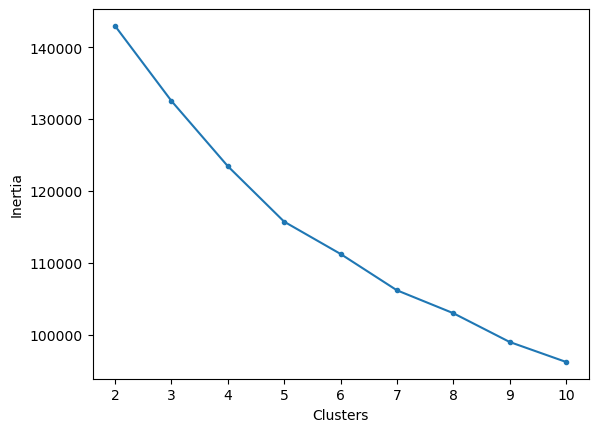

In [11]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_kmeans_df)  
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

The best cluster is 7 which is were the elbow occurs.

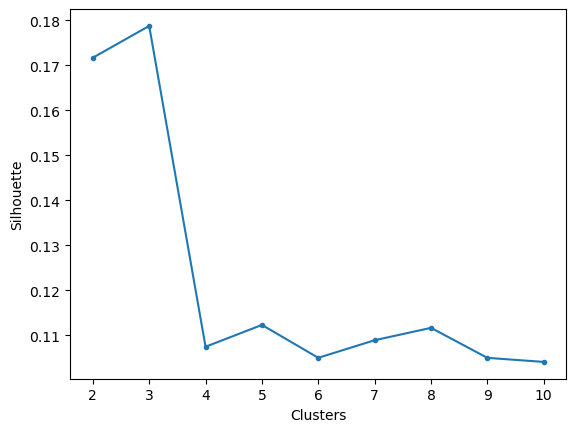

In [12]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_kmeans_df)
  silhouette_scores.append(silhouette_score(scaled_kmeans_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Clusters')
plt.ylabel('Silhouette');

The Silhouette shows at least 3 clusters. Lets try them both. 

In [13]:
#fit the KMeans model to get the Silhoutte score.
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_kmeans_df)
silhouette_score(scaled_kmeans_df, kmeans.labels_)

0.17876771018889318

In [14]:
# Instantiate a Kmeans model with the best value for k based on elbow plot method and silhouette score
km = KMeans(n_clusters=3, random_state=42)
km.fit(scaled_kmeans_df)

KMeans(n_clusters=3, random_state=42)

In [15]:
df['cluster']=km.labels_

# examine your dataframe with .head()
df.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,cluster
0,1,2,9,2,0,240,0,1,78,85,80,85,82,2
1,0,2,2,1,0,60,0,1,70,68,70,64,60,0
2,0,3,5,1,0,60,0,1,72,71,74,88,75,0
3,0,1,5,0,0,60,0,1,69,30,63,35,75,1
4,1,2,3,0,0,60,0,1,70,65,62,75,68,2


In [16]:
# Use .groupby() to investigate the any of the statistics above for each feature in each cluster.
cluster_groups = df.groupby('cluster')
cluster_mean= cluster_groups.mean()
cluster_mean

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
cluster,,,,,,,,,,,,,
0,0.000183,2.100642,4.386251,0.371586,0.098258,70.128323,0.089276,0.882676,76.141155,76.430247,86.319890,81.380202,86.224748
1,0.495710,1.944074,3.883063,0.262790,0.171274,81.021608,0.137274,0.403559,60.142040,61.761042,62.815062,57.137274,58.208770
2,0.999758,2.187500,4.834060,0.354651,0.070979,76.149467,0.060804,0.878876,81.695979,82.941376,83.930233,82.227471,82.546512


I am choosing the 3 cluster for this data. The 3 clusters differ in that they are the sum of what we have. Between 0 and 2 being so similar but having major features that make them unique. If I look at cluster 1 it has high levels of every aspect of the dataset. These cluster take into consideration the amount of features and what will more likely to predict students passing courses.

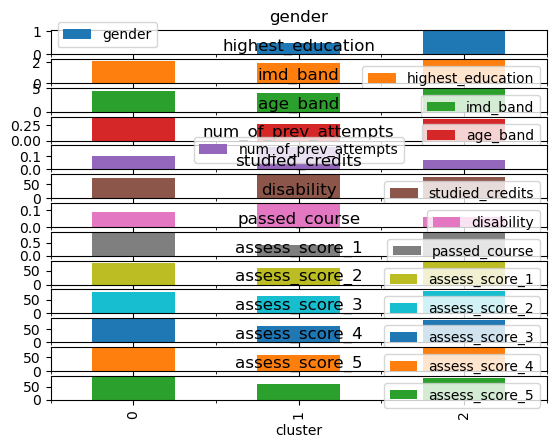

In [17]:
# Use visualizations to explore the statistics for each feature for each cluster.
cluster_mean.plot(subplots=True, kind='bar')
plt.rcParams["figure.figsize"] = (15,15)

Having this Bar plot shows the difference between these house clusters. 
0 and 2 have similar traits with everything but 2 has almost only one gender students with less disabilities and number of prior attempts.
Cluster 2 has more of a specific gender than the other two clusters. This cluster has far less disabled students and number of attempts.
Cluster 1 is the most well rounded cluster with an average amount of data from each column other than passing course and the amount of attempts.

In [18]:
#make two KMeans clusters and fit them to test out the way both cluster types look like.
kmeans7 = KMeans(n_clusters = 7)
kmeans3 = KMeans(n_clusters = 3)
kmeans7.fit(scaled_kmeans_df)
kmeans3.fit(scaled_kmeans_df)

KMeans(n_clusters=3)

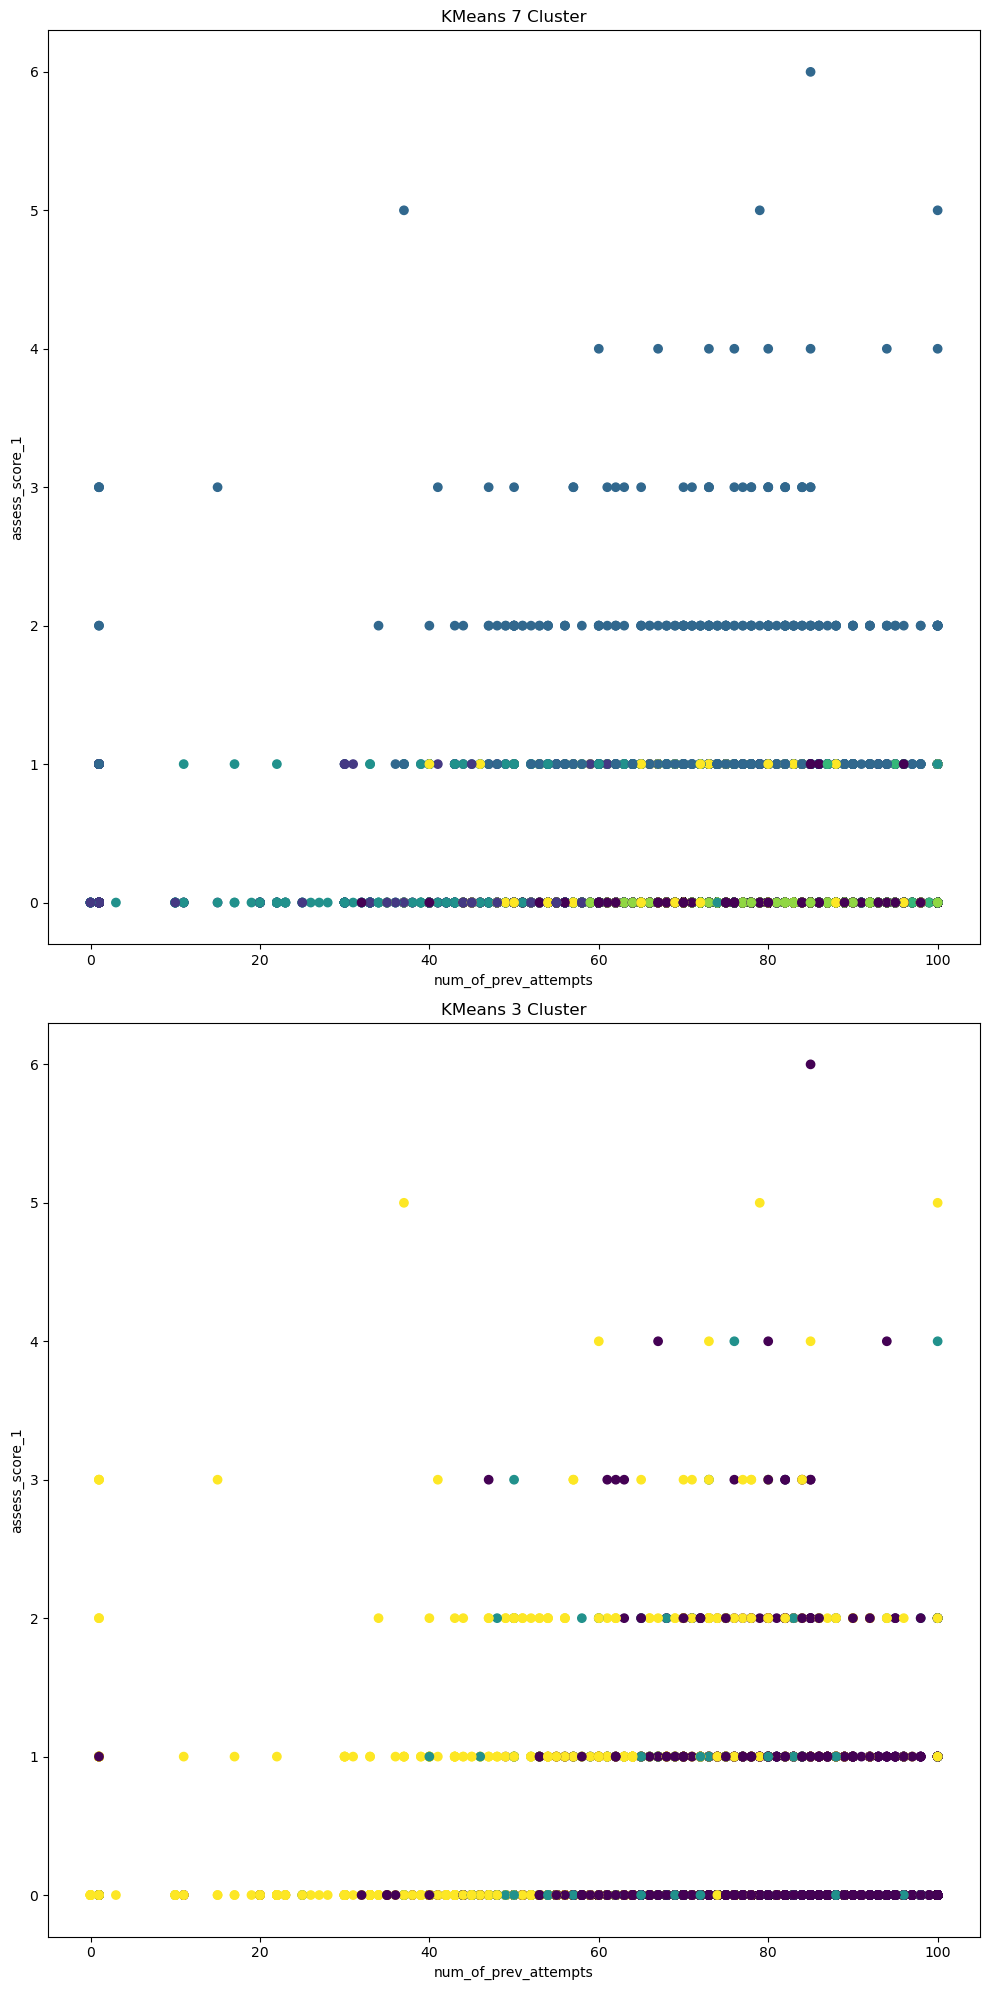

In [19]:
# Save the cluster labels to the dataframe 
kmeans_df['cluster7'] = kmeans7.labels_
kmeans_df['cluster3'] = kmeans3.labels_
# Visualize the clusters
fig, axes = plt.subplots(2,1, figsize=(10,20))
axes[0].scatter(kmeans_df['assess_score_1'],kmeans_df['num_of_prev_attempts'], c = kmeans_df['cluster7'])
axes[0].set_xlabel('num_of_prev_attempts')
axes[0].set_ylabel('assess_score_1')
axes[0].set_title('KMeans 7 Cluster')
axes[1].scatter(kmeans_df['assess_score_1'],kmeans_df['num_of_prev_attempts'], c = kmeans_df['cluster3'])
axes[1].set_xlabel('num_of_prev_attempts')
axes[1].set_ylabel('assess_score_1')
axes[1].set_title('KMeans 3 Cluster')
plt.tight_layout();

The cluster plot shows how many attempts and scores for the assess score 1. Together there is a definite cluster between 0(Green), 2(Yellow) and 1(Dark Blue). 1 and 2 clusters are are well defined while the Green cluster is sprinkled in between them. The Bar plot above really shows their similarities and differences better.

# Modeling

In [20]:
mod_df = pd.read_csv(r"C:\Users\miran\Downloads\Option_B_modeling.csv")
mod_df.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,assess_submitted_1,assess_submitted_2,assess_submitted_3,assess_submitted_4,assess_submitted_5,assess_submitted_6,assess_score_6,assess_submitted_7,assess_score_7,assess_submitted_8,assess_score_8,assess_submitted_9,assess_score_9,assess_submitted_10,assess_score_10,assess_submitted_11,assess_score_11,assess_submitted_12,assess_score_12,assess_submitted_13,assess_score_13,assess_submitted_14,assess_score_14,sum_activities_-25,sum_click_-25,activities_x_clicks_-25,sum_activities_-24,sum_click_-24,activities_x_clicks_-24,sum_activities_-23,sum_click_-23,activities_x_clicks_-23,sum_activities_-22,sum_click_-22,activities_x_clicks_-22,sum_activities_-21,sum_click_-21,activities_x_clicks_-21,sum_activities_-20,sum_click_-20,activities_x_clicks_-20,sum_activities_-19,sum_click_-19,activities_x_clicks_-19,sum_activities_-18,sum_click_-18,activities_x_clicks_-18,sum_activities_-17,sum_click_-17,activities_x_clicks_-17,sum_activities_-16,sum_click_-16,activities_x_clicks_-16,sum_activities_-15,sum_click_-15,activities_x_clicks_-15,sum_activities_-14,sum_click_-14,activities_x_clicks_-14,sum_activities_-13,sum_click_-13,activities_x_clicks_-13,sum_activities_-12,sum_click_-12,activities_x_clicks_-12,sum_activities_-11,sum_click_-11,activities_x_clicks_-11,sum_activities_-10,sum_click_-10,activities_x_clicks_-10,sum_activities_-9,sum_click_-9,activities_x_clicks_-9,sum_activities_-8,sum_click_-8,activities_x_clicks_-8,sum_activities_-7,sum_click_-7,activities_x_clicks_-7,sum_activities_-6,sum_click_-6,activities_x_clicks_-6,sum_activities_-5,sum_click_-5,activities_x_clicks_-5,sum_activities_-4,sum_click_-4,activities_x_clicks_-4,sum_activities_-3,sum_click_-3,activities_x_clicks_-3,sum_activities_-2,sum_click_-2,activities_x_clicks_-2,sum_activities_-1,sum_click_-1,activities_x_clicks_-1,sum_activities_0,sum_click_0,activities_x_clicks_0,sum_activities_1,sum_click_1,activities_x_clicks_1,sum_activities_2,sum_click_2,activities_x_clicks_2,sum_activities_3,sum_click_3,activities_x_clicks_3,sum_activities_4,sum_click_4,activities_x_clicks_4,sum_activities_5,sum_click_5,activities_x_clicks_5,sum_activities_6,sum_click_6,activities_x_clicks_6,sum_activities_7,sum_click_7,activities_x_clicks_7,sum_activities_8,sum_click_8,activities_x_clicks_8,sum_activities_9,sum_click_9,activities_x_clicks_9,sum_activities_10,sum_click_10,activities_x_clicks_10,sum_activities_11,sum_click_11,activities_x_clicks_11,sum_activities_12,sum_click_12,activities_x_clicks_12,sum_activities_13,sum_click_13,activities_x_clicks_13,sum_activities_14,sum_click_14,activities_x_clicks_14,sum_activities_15,sum_click_15,activities_x_clicks_15,sum_activities_16,sum_click_16,activities_x_clicks_16,sum_activities_17,sum_click_17,activities_x_clicks_17,sum_activities_18,sum_click_18,activities_x_clicks_18,sum_activities_19,sum_click_19,activities_x_clicks_19,sum_activities_20,sum_click_20,activities_x_clicks_20,sum_activities_21,sum_click_21,activities_x_clicks_21,sum_activities_22,sum_click_22,activities_x_clicks_22,sum_activities_23,sum_click_23,activities_x_clicks_23,sum_activities_24,sum_click_24,activities_x_clicks_24,sum_activities_25,sum_click_25,activities_x_clicks_25,sum_activities_26,sum_click_26,activities_x_clicks_26,sum_activities_27,sum_click_27,activities_x_clicks_27,sum_activities_28,sum_click_28,activities_x_clicks_28,sum_activities_29,sum_click_29,activities_x_clicks_29,sum_activities_30,sum_click_30,activities_x_clicks_30,sum_activities_31,sum_click_31,activities_x_clicks_31,sum_activities_32,sum_click_32,activities_x_clicks_32,sum_activities_33,sum_click_33,activities_x_clicks_33,sum_activities_34,sum_click_34,activities_x_clicks_34,sum_activities_35,sum_click_35,activities_x_clicks_35,sum_activities_36,sum_click_36,activities_x_clicks_36,sum_activities_37,sum_click_37,activities_

## Cleaning data

In [21]:
mod_df.duplicated().sum()

0

In [22]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Columns: 931 entries, gender to presentation_2014J
dtypes: float64(910), int64(21)
memory usage: 90.5 MB


In [23]:
mod_df.isna().sum()

gender                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
                       ..
presentation_0          0
presentation_2013B      0
presentation_2013J      0
presentation_2014B      0
presentation_2014J      0
Length: 931, dtype: int64

In [24]:
mod_df.describe()

gender  highest_education      imd_band      age_band  \
count  12737.000000       12737.000000  12737.000000  12737.000000   
mean       0.446651           2.089896      4.407788      0.339169   
std        0.497165           0.940941      2.806466      0.488947   
min        0.000000           0.000000      0.000000      0.000000   
25%        0.000000           1.000000      2.000000      0.000000   
50%        0.000000           2.000000      4.000000      0.000000   
75%        1.000000           3.000000      7.000000      1.000000   
max        1.000000           4.000000      9.000000      2.000000   

       num_of_prev_attempts  studied_credits    disability  passed_course  \
count          12737.000000     12737.000000  12737.000000   12737.000000   
mean               0.107404        74.758577      0.091858       0.763131   
std                0.389791        37.461960      0.288837       0.425178   
min                0.000000        30.000000      0.000000       0.000000   
25%                0.000000        60.000000      0.000000       1.000000   
50%                0.000000        60.000000      0.000000       1.000000   
75%                0.000000        90.000000      0.000000       1.000000   
max                6.000000       630.000000      1.000000       1.000000   

       assess_score_1  assess_score_2  assess_score_3  assess_score_4  \
count    12737.000000    12737.000000    12737.000000    12737.000000   
mean        73.988773       74.916935       79.734474       75.672686   
std         19.162201       14.650798       17.650248       17.969746   
min          0.000000        0.000000        0.000000        0.000000   
25%         66.000000       66.000000       69.000000       65.000000   
50%         77.000000       76.000000       81.000000       79.000000   
75%         86.000000       86.000000       95.000000       89.000000   
max        100.000000      100.000000      100.000000      100.000000   

       assess_score_5  assess_submitted_1  assess_submitted_2  \
count    12737.000000        12737.000000        12737.000000   
mean        78.116589           -1.879485           -1.245819   
std         19.530364            6.084711            8.378863   
min          0.000000          -61.000000         -216.000000   
25%         67.000000           -3.000000           -2.000000   
50%         80.000000           -1.000000           -1.000000   
75%         96.000000            0.000000            0.000000   
max        100.000000           91.000000          259.000000   

       assess_submitted_3  assess_submitted_4  assess_submitted_5  \
count        12737.000000        12737.000000        12737.000000   
mean            -0.130957          -16.561828          -14.122949   
std             16.409068           45.420638           42.914937   
min           -233.000000         -244.000000         -243.000000   
25%             -1.000000           -3.000000           -3.000000   
50%              2.000000           -1.000000            1.000000   
75%              2.000000            0.000000            3.000000   
max            362.000000          370.000000          370.000000   

       assess_submitted_6  assess_score_6  assess_submitted_7  assess_score_7  \
count        12737.000000    12737.000000        12737.000000    12737.000000   
mean           -38.700714       64.982570          -27.925179       63.806312   
std             71.339035       33.217829           60.315706       36.714381   
min           -244.000000        0.000000         -243.000000        0.000000   
25%            -50.000000       53.000000          -23.000000       42.000000   
50%             -1.000000       78.000000            0.000000       80.000000   
75%              0.000000       89.000000            2.000000       94.000000   
max            372.000000      100.000000          372.000000      100.000000   

       assess_submitted_8  assess_score_8  assess_submitted_9  assess_score_9  \
count      

In [25]:
#make a copy of data. Incase I mess up.
belt_df = mod_df.copy()

### Preparing for Modeling

In [26]:
#Target
target = 'passed_course'
X = belt_df.drop(columns = [target])
y = belt_df[target]

In [27]:
X.shape

(12737, 930)

In [28]:
mod_scaler = scaler.fit_transform(X)
mod_scaler

array([[ 1.11305079, -0.09554172,  1.63636108, ...,  1.61943894,
        -0.54004999, -0.66542892],
       [-0.8984316 , -0.09554172, -0.85797681, ...,  1.61943894,
        -0.54004999, -0.66542892],
       [-0.8984316 ,  0.96726601,  0.21102514, ...,  1.61943894,
        -0.54004999, -0.66542892],
       ...,
       [-0.8984316 , -1.15834944, -0.14530884, ..., -0.61749781,
        -0.54004999,  1.50279011],
       [-0.8984316 ,  0.96726601, -0.85797681, ..., -0.61749781,
        -0.54004999,  1.50279011],
       [-0.8984316 , -0.09554172,  0.21102514, ..., -0.61749781,
        -0.54004999,  1.50279011]])

## PCA

In [29]:
pca = PCA()
pca.fit(mod_scaler)

PCA()

In [30]:
pd.Series(pca.explained_variance_ratio_) 

0      9.849593e-02
1      1.800821e-02
2      1.193488e-02
3      1.122841e-02
4      9.455998e-03
           ...     
925    1.816176e-05
926    1.383380e-05
927    2.730638e-33
928    4.201287e-34
929    1.268475e-34
Length: 930, dtype: float64

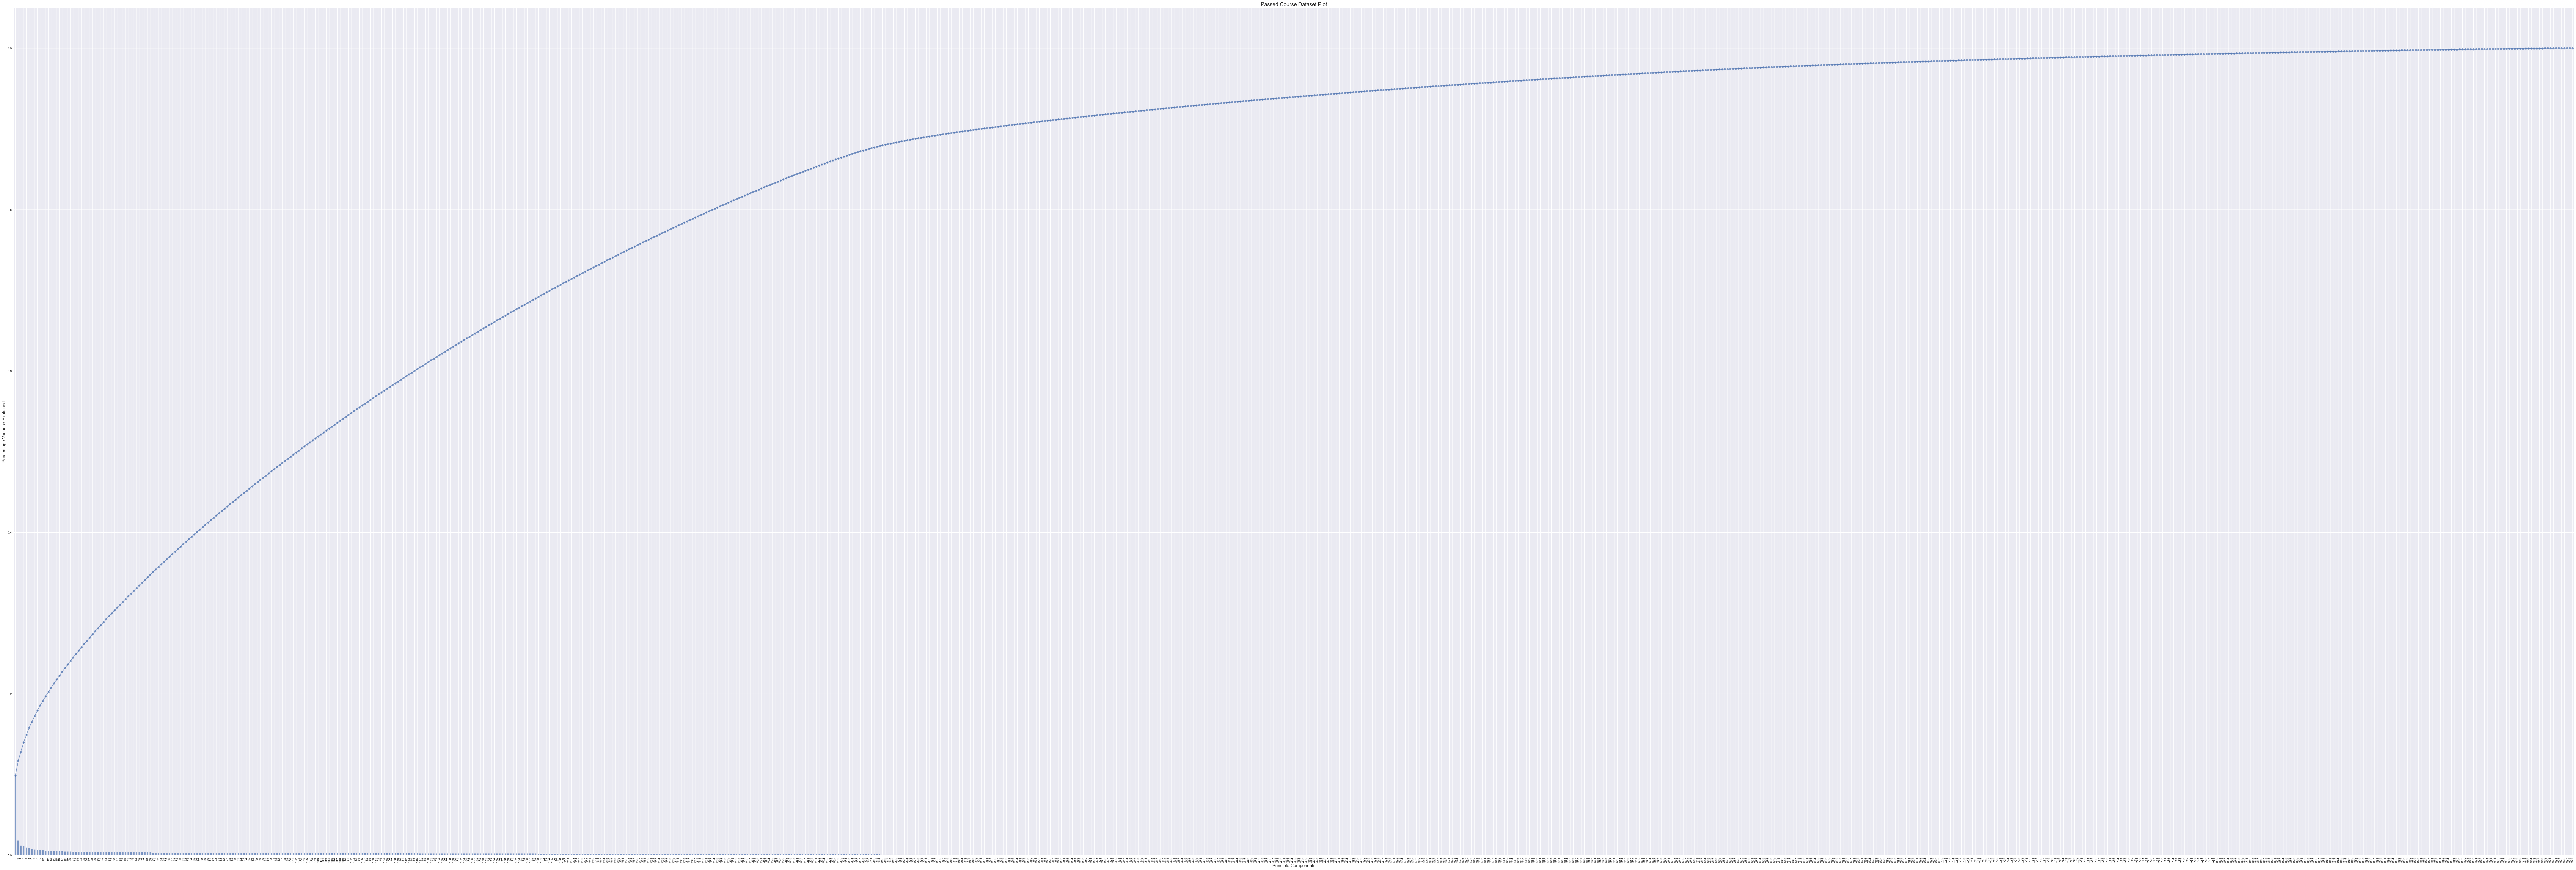

In [31]:
# Lets visual the cummulative sum of the variances 

plt.style.use("seaborn")
plt.figure(figsize=(150,50))
exp_var = pd.Series(pca.explained_variance_ratio_)

# Plot the variance for each component
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)
    
# Plot line chart of increasing variances
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Passed Course Dataset Plot", fontsize="xx-large")
pd.Series(var_ls).plot(marker="o", alpha=0.7) 
plt.xticks(rotation=90)
plt.show();

In [32]:
# Split train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
pipe = make_pipeline(
    StandardScaler(),
    PCA(n_components=664))

In [34]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=664))])

In [35]:
X_train_proc = pipe.transform(X_train)
X_test_proc= pipe.transform(X_test)

In [36]:
# Checking for missing values and is the data is scaled.
print(np.isnan(X_train_proc).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_proc).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_proc.dtype)
print('All data in X_test_processed are', X_test_proc.dtype)
print('\n')
print('shape of data is', X_train_proc.shape)
print('\n')
X_train_proc[:5]

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (9552, 664)




array([[-7.44353649, -0.63335605, -0.57035076, ..., -0.04828755,
         0.01535503, -0.03310035],
       [-1.48033114,  2.08452618,  0.74225097, ...,  0.1060883 ,
         0.15748316, -0.14502446],
       [ 9.61499712, -1.88932568, -4.72362042, ...,  0.43554346,
         0.69013541, -0.3100961 ],
       [-9.09208593, -0.29360189,  0.86480317, ...,  0.04952665,
        -0.0801883 ,  0.03275028],
       [12.28446847, -6.11629825,  3.28191309, ..., -0.11330373,
         0.04202935,  0.51046521]])

## Sequential models

In [37]:
shape_input = X_train_proc.shape[1]

### Variance and Bias

In [38]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [39]:
# Sequential model
vbmodel = Sequential()
# First hidden layer
vbmodel.add(Dense(2, input_dim = shape_input, activation = 'relu'))
vbmodel.add(Dense(1, activation = 'relu'))
vbmodel.add(Dense(1, activation = 'sigmoid'))
vbmodel.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy',
                                                         metrics.Precision(),
                                                         metrics.Recall()])
vb_history = vbmodel.fit(X_train_proc, y_train,
                    validation_data = (X_test_proc, y_test), 
                    epochs=50)

Epoch 1/50
299/299 [==============================] - 2s 3ms/step - loss: 0.5292 - accuracy: 0.7642 - precision: 0.7645 - recall: 0.9995 - val_loss: 0.4782 - val_accuracy: 0.7589 - val_precision: 0.7589 - val_recall: 1.0000
Epoch 2/50
299/299 [==============================] - 1s 2ms/step - loss: 0.4266 - accuracy: 0.7646 - precision: 0.7646 - recall: 1.0000 - val_loss: 0.4464 - val_accuracy: 0.7589 - val_precision: 0.7589 - val_recall: 1.0000
Epoch 3/50
299/299 [==============================] - 1s 2ms/step - loss: 0.3879 - accuracy: 0.7725 - precision: 0.7760 - recall: 0.9875 - val_loss: 0.4326 - val_accuracy: 0.7589 - val_precision: 0.7589 - val_recall: 1.0000
Epoch 4/50
299/299 [==============================] - 1s 2ms/step - loss: 0.3612 - accuracy: 0.8438 - precision: 0.8893 - recall: 0.9088 - val_loss: 0.4340 - val_accuracy: 0.8283 - val_precision: 0.8835 - val_recall: 0.8912
Epoch 5/50
299/299 [==============================] - 1s 2ms/step - loss: 0.3428 - accuracy: 0.8593 - pr

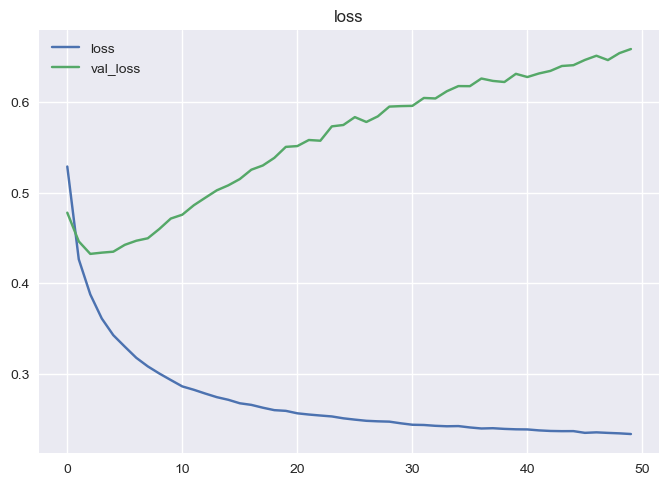

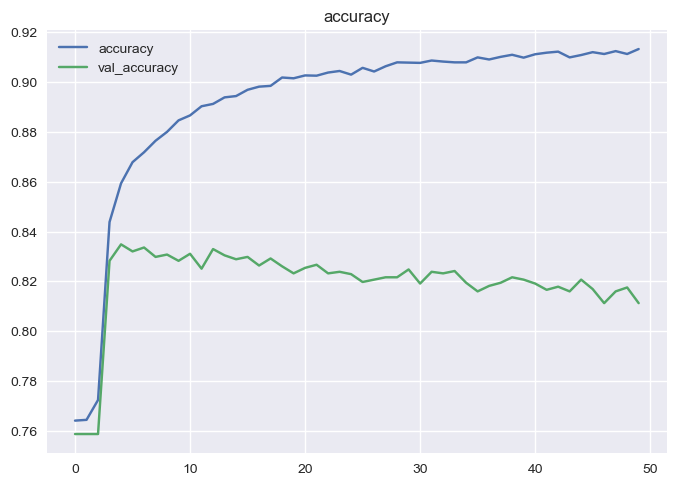

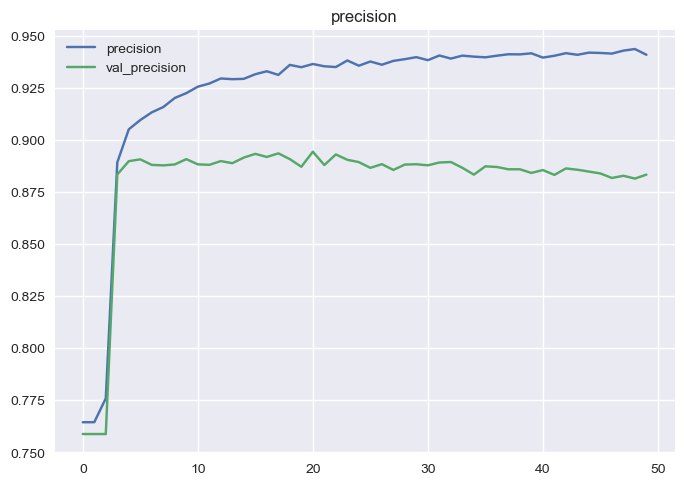

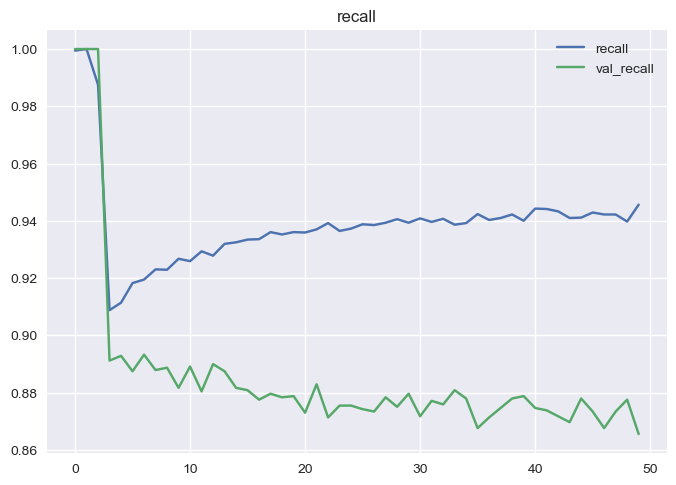

In [40]:
# plot learning
plot_history(vb_history)

#### I have changed everything from dense layers and epoch even looked at changing the relu to sigmoid, even tanh, but the set doesn't want to work well together. In the end Sigmoid had the best outcome so I left it alone and moved on to the other sequential. I could not get this sequence any more simple and balanced than this.

### With dropout

In [49]:
# Sequential model
drop_model = Sequential()
# First hidden layer
drop_model.add(Dense(3,
                input_dim = shape_input,
                activation = 'relu'))
drop_model.add(Dropout(0.2))
drop_model.add(Dense(1, activation = 'relu'))
drop_model.add(Dropout(0.2))
drop_model.add(Dense(1, activation = 'sigmoid'))
drop_model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy',
                                                         metrics.Precision(),
                                                         metrics.Recall()])
drop_history = drop_model.fit(X_train_proc, y_train,
                    validation_data = (X_test_proc, y_test), 
                    epochs=50)

Epoch 1/50
299/299 [==============================] - 2s 3ms/step - loss: 0.6794 - accuracy: 0.7022 - precision_5: 0.8063 - recall_5: 0.8034 - val_loss: 0.6283 - val_accuracy: 0.8069 - val_precision_5: 0.8157 - val_recall_5: 0.9632
Epoch 2/50
299/299 [==============================] - 1s 2ms/step - loss: 0.5879 - accuracy: 0.8169 - precision_5: 0.8307 - recall_5: 0.9552 - val_loss: 0.5510 - val_accuracy: 0.8527 - val_precision_5: 0.8637 - val_recall_5: 0.9570
Epoch 3/50
299/299 [==============================] - 1s 2ms/step - loss: 0.5209 - accuracy: 0.8365 - precision_5: 0.8533 - recall_5: 0.9493 - val_loss: 0.4856 - val_accuracy: 0.8622 - val_precision_5: 0.8721 - val_recall_5: 0.9590
Epoch 4/50
299/299 [==============================] - 1s 2ms/step - loss: 0.4775 - accuracy: 0.8443 - precision_5: 0.8547 - recall_5: 0.9595 - val_loss: 0.4468 - val_accuracy: 0.8615 - val_precision_5: 0.8681 - val_recall_5: 0.9640
Epoch 5/50
299/299 [==============================] - 1s 2ms/step - loss

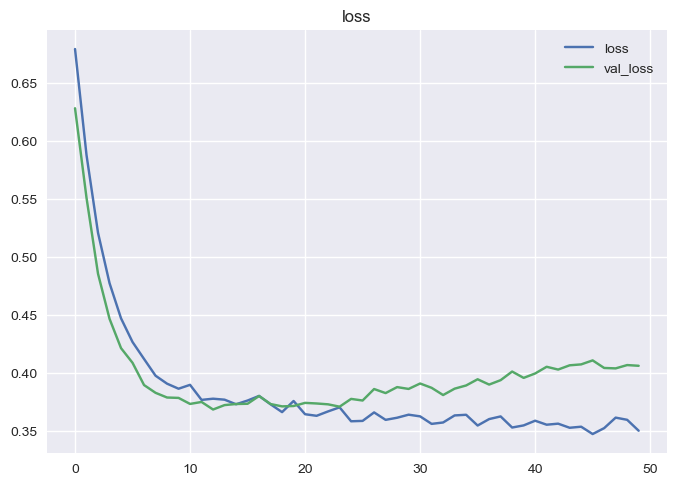

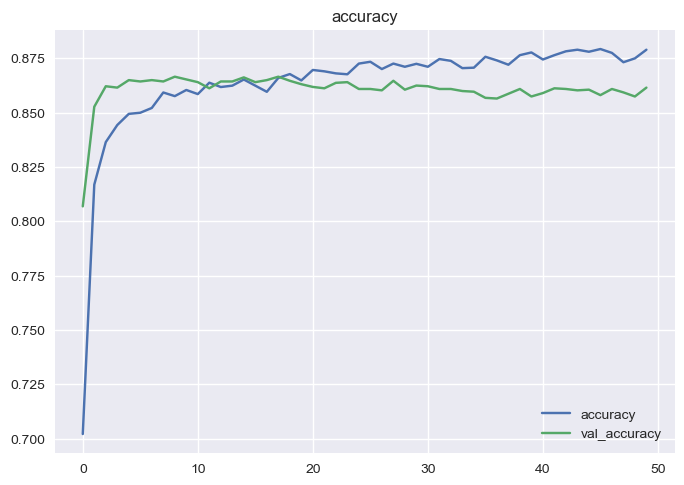

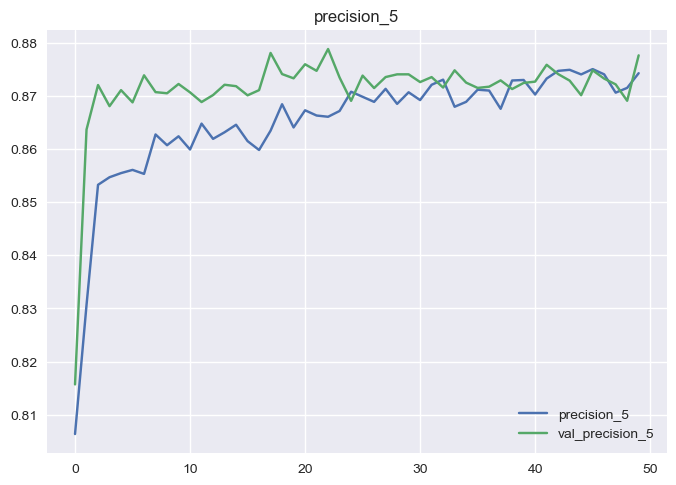

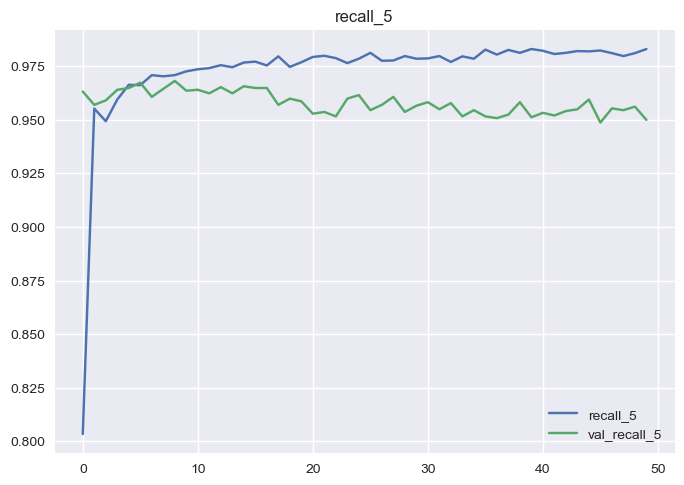

In [50]:
# plot learning
plot_history(drop_history)

#### I have changed the epoch, the dense levels for the first and mid layers and have come with the best plot from all the other ones. This makes the most sense to me and would do great with other similar dataset.  With lots of cross overs between the train and test I like this sequential best.

### Early Stop

In [45]:
# Sequential model
es_model = Sequential()
# First hidden layer
es_model.add(Dense(3,
                input_dim = shape_input,
                activation = 'relu'))
es_model.add(Dropout(0.2))
es_model.add(Dense(1, activation = 'relu'))
es_model.add(Dropout(0.2))
es_model.add(Dense(1, activation = 'sigmoid'))
es_model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy',
                                                         metrics.Precision(),
                                                         metrics.Recall()])
es_history = es_model.fit(X_train_proc, y_train,
                    validation_data = (X_test_proc, y_test), 
                    epochs=40)

Epoch 1/40
299/299 [==============================] - 2s 3ms/step - loss: 0.9397 - accuracy: 0.5669 - precision_3: 0.8344 - recall_3: 0.5409 - val_loss: 0.6799 - val_accuracy: 0.7111 - val_precision_3: 0.8937 - val_recall_3: 0.7029
Epoch 2/40
299/299 [==============================] - 1s 2ms/step - loss: 0.6145 - accuracy: 0.7768 - precision_3: 0.8505 - recall_3: 0.8591 - val_loss: 0.5622 - val_accuracy: 0.8370 - val_precision_3: 0.8707 - val_recall_3: 0.9222
Epoch 3/40
299/299 [==============================] - 1s 2ms/step - loss: 0.5362 - accuracy: 0.8263 - precision_3: 0.8478 - recall_3: 0.9419 - val_loss: 0.5067 - val_accuracy: 0.8562 - val_precision_3: 0.8675 - val_recall_3: 0.9566
Epoch 4/40
299/299 [==============================] - 1s 2ms/step - loss: 0.4889 - accuracy: 0.8399 - precision_3: 0.8509 - recall_3: 0.9586 - val_loss: 0.4657 - val_accuracy: 0.8612 - val_precision_3: 0.8686 - val_recall_3: 0.9628
Epoch 5/40
299/299 [==============================] - 1s 2ms/step - loss

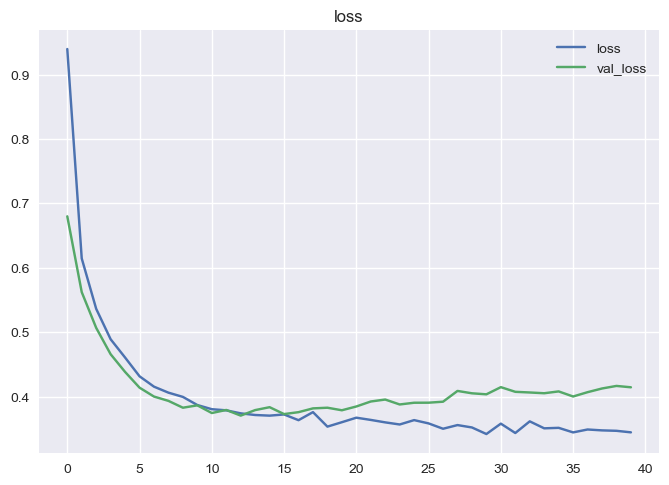

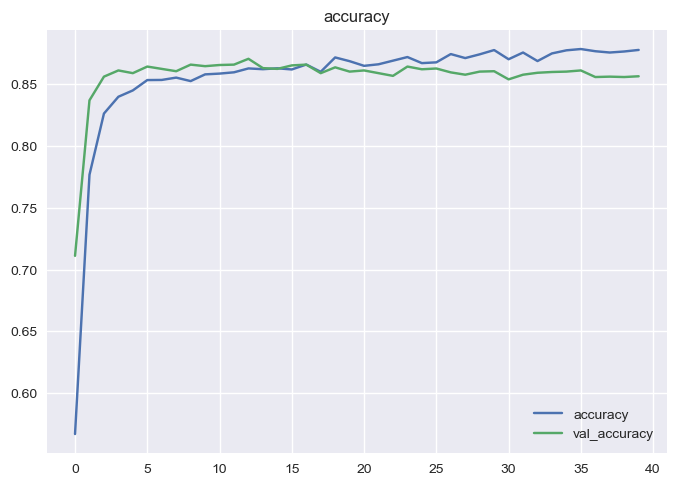

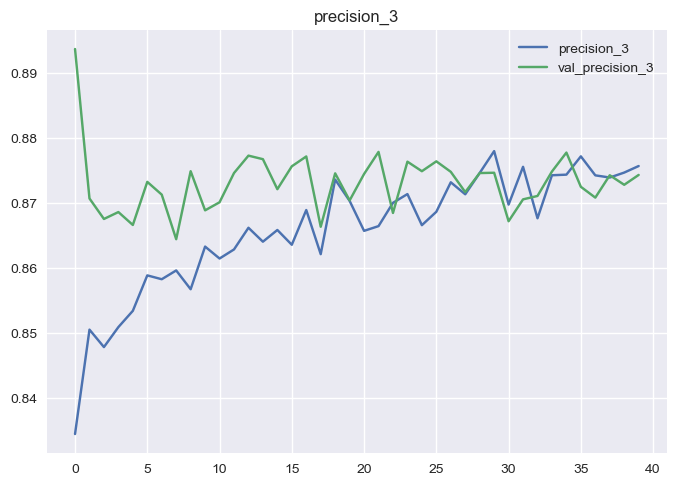

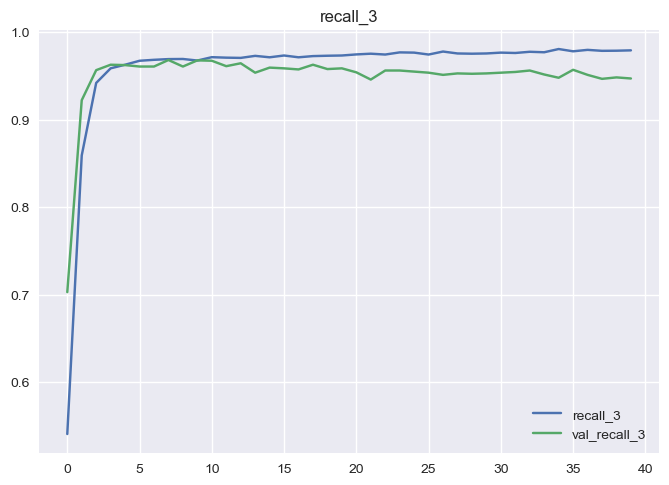

In [46]:
# plot learning
plot_history(es_history)

#### I alway liked stop early because it was a time saver and it would well with datasets, but now I can see that it does work well with smaller sets. I changed epochs, the dense layers, just like the original sequential model shows I went through all the different activation but it failed me this time. I am looking forward to use this sequential again to see how close I can get with the training and test datasets.

### The best sequential in my opinion is  drop. It has the best balance between the the testing and training models. It will give the best outcome for this dataset with far less variance and bias for any other future dataset for this concern. Looking at the plots for drop there are a lot of small variances between the testing and training set but they lines do cross at certain points making it the most fitted model.